In [3]:
import pandas as pd 
import numpy as np

# NHTSA data of ALL motor vehicle accidents instead of just fatal accidents - received from Prof. Miller

longfars = pd.read_csv('fars-BOX.csv', usecols=[0,1,8,9,10,11,15,18,19,22,23,24,25,26,27,29,30,46,71,72,79, 86, 93,
                                                99, 106,112, 119])

print("num columns: " + str(len(longfars.columns)))
print("rows: " + str(len(longfars)))
print(longfars.columns)


longfars.head()

# nicely put into quartiles

num columns: 27
rows: 109668
Index(['AccNum', 'Tract', 'NumInjury', 'NumKilled', 'NumVeh', 'AccTime', 'DD',
       'PersonAge', 'PersonSex', 'pop', 'medianAge', 'income', 'pctProverty',
       'pctWhite', 'pctBlack', 'pctOccup', 'pctVacant', 'DUI', 'dayLight',
       'popQT', 'incomeQT', 'provertyQT', 'occupQT', 'vacantQT', 'hsQT',
       'whiteQT', 'blackQT'],
      dtype='object')


,AccNum,Tract,NumInjury,NumKilled,NumVeh,AccTime,DD,PersonAge,PersonSex,pop,...,DUI,dayLight,popQT,incomeQT,provertyQT,occupQT,vacantQT,hsQT,whiteQT,blackQT
0,100010003,29107090400,1,0,2,1600.0,4.0,16.0,1.0,6673,...,0.0,1.0,4.0,1,2,2,3,1,3,2
1,100010004,29095017700,1,0,1,233.0,2.0,16.0,1.0,5392,...,1.0,0.0,3.0,1,2,4,1,3,3,2
2,100010006,29189212700,1,0,2,430.0,4.0,27.0,1.0,5846,...,0.0,0.0,3.0,1,3,2,3,1,1,4
3,100010008,29041470100,1,0,2,1520.0,4.0,19.0,1.0,2159,...,0.0,1.0,1.0,1,2,1,4,1,4,1
4,100010009,29029950600,0,0,2,1600.0,4.0,17.0,2.0,4908,...,0.0,1.0,3.0,1,2,1,4,2,4,1


In [4]:
# dealt with NaN values by using the interpolate() function
print(len(longfars))
longfars = longfars.interpolate()

longfars.loc[np.isnan(longfars.DD)]

109668


,AccNum,Tract,NumInjury,NumKilled,NumVeh,AccTime,DD,PersonAge,PersonSex,pop,...,DUI,dayLight,popQT,incomeQT,provertyQT,occupQT,vacantQT,hsQT,whiteQT,blackQT


In [5]:
# sort the data by census tract

longfars = longfars.sort_values('Tract')

# so we can separate the tract characteristics into a separate d.f. than the accidents
charvars = ['Tract', 'pop','medianAge', 'income', 'pctProverty', 'pctWhite', 'pctBlack', 'pctOccup', 
            'pctVacant','popQT', 'incomeQT', 'provertyQT', 'occupQT', 'vacantQT', 'hsQT', 'whiteQT', 'blackQT' ]

tract_characteristics = longfars[charvars]
tract_characteristics = tract_characteristics.drop_duplicates('Tract')

charvars.pop(0) # pop Tract off the list bc we want it in accidents as well 
#print(charvars)
accidents = longfars.drop(charvars, axis=1)

print(len(tract_characteristics))

%store tract_characteristics

tract_characteristics.Tract = tract_characteristics.Tract.apply(lambda x: str(x))


tract_characteristics.head()


1391
Stored 'tract_characteristics' (DataFrame)


,Tract,pop,medianAge,income,pctProverty,pctWhite,pctBlack,pctOccup,pctVacant,popQT,incomeQT,provertyQT,occupQT,vacantQT,hsQT,whiteQT,blackQT
107434,29001950100,3638,40.799999,22055,17.400000,97.993403,0.082463,86.718285,13.281715,2.0,1,3,2,3,2,4,1
100792,29001950200,3166,43.599998,21311,9.800000,93.809223,1.326595,75.821451,24.178549,1.0,1,2,1,4,2,3,2
59339,29001950300,2729,27.600000,13940,39.799999,96.152437,2.088677,85.944272,14.055728,1.0,1,4,1,4,3,4,2
13875,29001950400,4053,33.200001,23041,16.400000,96.471749,0.912904,93.099730,6.900270,2.0,1,2,3,2,4,4,2
34964,29001950500,6886,32.799999,20678,29.100000,91.431891,2.555911,90.392749,9.607251,4.0,1,3,2,3,4,3,2


In [6]:
print(accidents.shape)
 

# nan vals for these can both be set to zero
accidents.loc[np.isnan(accidents.dayLight), 'dayLight'] = 0
accidents.loc[np.isnan(accidents.DUI), 'DUI'] = 0

# otherwise interpolate
accidents = accidents.interpolate()

accidents.Tract = accidents.Tract.apply(lambda x: str(x))

for c in accidents.drop('Tract', axis=1).columns:
    print(np.any(np.isnan(accidents[c])))
#for c in accidents.columns:

print(accidents.shape)
accidents.head()
%store accidents
# sex-- is 1:male, 2:female?? 

(109668, 11)
False
False
False
False
False
False
False
False
False
False
(109668, 11)
Stored 'accidents' (DataFrame)


In [7]:
sumfatals = longfars.groupby('Tract', as_index=False)['NumKilled', 'NumInjury', 'NumVeh'].sum()


# total amount of fatalities, injuries, and vehicles involved in accidents
sumfatals.Tract = sumfatals.Tract.apply(lambda x: str(x))

print(len(sumfatals))

total = longfars.groupby('Tract', as_index=False)['AccNum'].count()

sumfatals = sumfatals.assign(NumAcc = total.AccNum)

sumfatals.head()


1391


,Tract,NumKilled,NumInjury,NumVeh,NumAcc
0,29001950100,0,13,45,31
1,29001950200,5,59,67,45
2,29001950300,1,34,161,81
3,29001950400,0,11,63,32
4,29001950500,0,34,123,60


In [8]:
# continuous variables for each census tract

%store -r mergedcont

print(mergedcont.shape)

mergedcont.head()
#mergedcont[mergedcont.total == 0]

(1391, 24)


,GIS_code,census_year,st_code,total,urban,rural,male,female,male15_24,hh_income,...,cyclists,walkers,under15,over45,male16_19,inschool_m1619,unenrolled_m1619,unemployed_m1619,lowest_ratio,highest_ratio
0,29001950100,2010,29,3802,0.0000,100.0000,51.1310,48.8690,224,44273.0,...,0.00,0.75,20.35,5.92,51.36,48.64,2.73,0.00,3.79,62.08
1,29001950200,2010,29,3019,0.0000,100.0000,51.1096,48.8904,172,45923.0,...,0.00,0.21,18.11,6.72,75.00,63.30,11.70,5.32,8.23,64.25
2,29001950300,2010,29,2951,93.2565,6.7435,49.4070,50.5930,447,26333.0,...,0.86,19.01,86.13,2.42,26.32,13.16,13.16,0.00,25.97,32.09
3,29001950400,2010,29,3892,72.9959,27.0041,46.3772,53.6228,246,52439.0,...,1.88,1.15,73.50,5.34,49.43,37.93,11.49,0.00,8.25,58.53
4,29001950500,2010,29,7079,77.0872,22.9128,47.5067,52.4933,909,60551.0,...,2.22,4.02,74.12,2.63,39.46,32.18,7.28,7.28,15.42,55.86


In [9]:
# merge all the data into one big d.f. so it's easy to use statsmodels 

merged = mergedcont.merge(sumfatals, left_on='GIS_code', right_on='Tract')

# dont want to run regressions on these guys
drops = ['GIS_code', 'census_year', 'st_code', 'Tract', 'total']
# y vars
nums = ['NumKilled', 'NumInjury', 'NumVeh', 'NumAcc']

# add .copy() to solve settingwithcopywarning
data_matrix = merged.copy()
# normalize the dependent variables by the population in each tract

#for n in nums:
    #pctpop.append(np.round(merged[n] / merged['total'] * 10000, 2))
    


data_matrix = data_matrix.merge(tract_characteristics, left_on='GIS_code', right_on='Tract')


print(merged.shape)

print(data_matrix.shape)

data_matrix.loc[np.isnan(data_matrix.popQT), 'popQT'] = 1

data_matrix = data_matrix.join(data_matrix[nums].div(merged['total'], axis=0), rsuffix='_pctpop')

nums = [n + '_pctpop' for n in nums]

data_matrix[nums] = np.round(data_matrix[nums]*10000, 2)
data_matrix[nums].head()


(1389, 29)
(1389, 46)


,NumKilled_pctpop,NumInjury_pctpop,NumVeh_pctpop,NumAcc_pctpop
0,0.00,34.19,118.36,81.54
1,16.56,195.43,221.93,149.06
2,3.39,115.22,545.58,274.48
3,0.00,28.26,161.87,82.22
4,0.00,48.03,173.75,84.76


In [10]:

print(np.any(np.isnan(data_matrix[nums])))

# numkilled, numinjuries, numveh
for n in nums:
    print(data_matrix[n].max())
    print(data_matrix[n].mean())



False
25.85
1.2485313174945996
310000.0
349.80105111591104
1110000.0
1294.7150683945279
650000.0
735.2436645068395


In [11]:
# find the percentage of fatalities by total number of car accidents

data_matrix['NumKilled_pctacc'] = np.round(data_matrix['NumKilled'] / data_matrix['NumAcc'] * 1000, 2)


4304.015838732901
12720


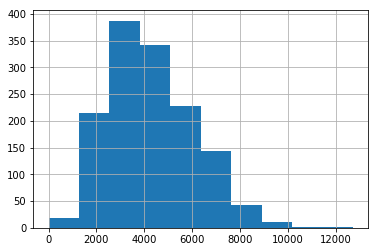

In [13]:
import matplotlib.pyplot as plt

print(merged.total.mean())
print(merged.total.max())

%matplotlib inline

# histogram of populations
merged.total.hist()


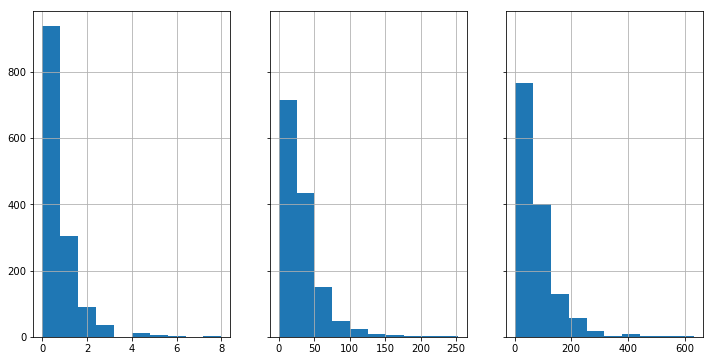

In [16]:
#data_matrix = data_matrix[np.isfinite(data_matrix.pctWhite)]
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,3,sharey=True, figsize=(12,6))

sumfatals.NumKilled.hist(ax=axs[0])
sumfatals.NumInjury.hist(ax=axs[1])
sumfatals.NumAcc.hist(ax=axs[2])

In [17]:
import statsmodels.api as sm


In [261]:
# x variables: continuous

X = data_matrix[['medianAge', 'income', 'pctProverty', 'pctWhite', 'pctBlack', 'pctOccup', 
            'pctVacant', 'urban', 'rural', 'male', 'female', 'hh_income', 'drivers',
       'solodrivers', 'carpoolers', 'pubtrans', 'cyclists', 'walkers',
       'under15', 'over45', 'male16_19', 'inschool_m1619', 'unenrolled_m1619',
       'unemployed_m1619', 'lowest_ratio', 'highest_ratio']].copy()

#print(X.shape)

X_cat = data_matrix[['incomeQT', 'provertyQT', 'occupQT', 'vacantQT', 'hsQT', 'whiteQT', 'blackQT' ]]
#for c in X.columns:
    #print(np.any(np.isnan(X[c])))
# ok there are NaN but need to drop them from data_matrix
    
print(X_cat.shape)


(1385, 7)


In [257]:
linmods = []

yy = data_matrix.NumKilled
#print(len(yy))

# ok now running linear regressions for each constant variable and 
# adding them to a list
for cat in X.columns:
    tempx = X[cat]
    tempx = sm.add_constant(tempx)
    templm = sm.OLS(yy, tempx).fit()
    linmods.append(templm)
    #print(templm.summary())
    
# then sorting by p vals

linmods = sorted(linmods, key=lambda x: x.pvalues[1])

# and printing the results
for lm in linmods:
    #print("\n" + lm.params + "\n")
    parameters = list(dict(lm.params).keys())
    print("\n" + parameters[1] + "\n")
    print(lm.summary())


rural

                            OLS Regression Results                            
Dep. Variable:              NumKilled   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 27 Apr 2017   Prob (F-statistic):           2.80e-29
Time:                        21:17:12   Log-Likelihood:                -3117.4
No. Observations:                1385   AIC:                             6239.
Df Residuals:                    1383   BIC:                             6249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7381      0.076      9.678 

In [385]:
# clean up these extra Tract vars (created from merges)
data_matrix = data_matrix.drop(['Tract_y', 'Tract_x'], axis=1)

print(data_matrix.columns)


Index(['GIS_code', 'census_year', 'st_code', 'total', 'urban', 'rural', 'male',
       'female', 'male15_24', 'hh_income', 'drivers', 'solodrivers',
       'carpoolers', 'pubtrans', 'cyclists', 'walkers', 'under15', 'over45',
       'male16_19', 'inschool_m1619', 'unenrolled_m1619', 'unemployed_m1619',
       'lowest_ratio', 'highest_ratio', 'NumKilled', 'NumInjury', 'NumVeh',
       'NumAcc', 'pop', 'medianAge', 'income', 'pctProverty', 'pctWhite',
       'pctBlack', 'pctOccup', 'pctVacant', 'popQT', 'incomeQT', 'provertyQT',
       'occupQT', 'vacantQT', 'hsQT', 'whiteQT', 'blackQT', 'NumKilled_pctpop',
       'NumInjury_pctpop', 'NumVeh_pctpop', 'NumAcc_pctpop',
       'NumKilled_pctacc'],
      dtype='object')


In [386]:
# store the tables to use in a new notebook

%store X_cat
%store X
%store yy
%store data_matrix

Stored 'X_cat' (DataFrame)
Stored 'X' (DataFrame)
Stored 'yy' (Series)
Stored 'data_matrix' (DataFrame)
